In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random
import decimal
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
date = pd.date_range('2016 Jul 15 10:15:00',periods=1000,freq='1min')
date

DatetimeIndex(['2016-07-15 10:15:00', '2016-07-15 10:16:00',
               '2016-07-15 10:17:00', '2016-07-15 10:18:00',
               '2016-07-15 10:19:00', '2016-07-15 10:20:00',
               '2016-07-15 10:21:00', '2016-07-15 10:22:00',
               '2016-07-15 10:23:00', '2016-07-15 10:24:00',
               ...
               '2016-07-16 02:45:00', '2016-07-16 02:46:00',
               '2016-07-16 02:47:00', '2016-07-16 02:48:00',
               '2016-07-16 02:49:00', '2016-07-16 02:50:00',
               '2016-07-16 02:51:00', '2016-07-16 02:52:00',
               '2016-07-16 02:53:00', '2016-07-16 02:54:00'],
              dtype='datetime64[ns]', length=1000, freq='T')

In [4]:
def is_fibonacci(n):
    phi = 0.5 + 0.5 * math.sqrt(5.0)
    a = phi * n
    return n == 0 or abs(round(a) - a) < 1.0 / n

In [5]:
li = []
for i in range(0,1000):
    if is_fibonacci(i) or (i % 8 == 0) or (i % 18 == 0):
        li.append(random.randint(1, 10))
    else:
        li.append(random.randint(7,10))

In [6]:
dataset = pd.DataFrame(li)
dataset.head()

,0
0,8
1,8
2,4
3,8
4,8


In [7]:
dataset['Time'] = date
dataset.head()

,0,Time
0,8,2016-07-15 10:15:00
1,8,2016-07-15 10:16:00
2,4,2016-07-15 10:17:00
3,8,2016-07-15 10:18:00
4,8,2016-07-15 10:19:00


In [8]:
dataset.columns = ['Rating','Time']
dataset.head()

,Rating,Time
0,8,2016-07-15 10:15:00
1,8,2016-07-15 10:16:00
2,4,2016-07-15 10:17:00
3,8,2016-07-15 10:18:00
4,8,2016-07-15 10:19:00


In [9]:
dataset.head()

,Rating,Time
0,8,2016-07-15 10:15:00
1,8,2016-07-15 10:16:00
2,4,2016-07-15 10:17:00
3,8,2016-07-15 10:18:00
4,8,2016-07-15 10:19:00


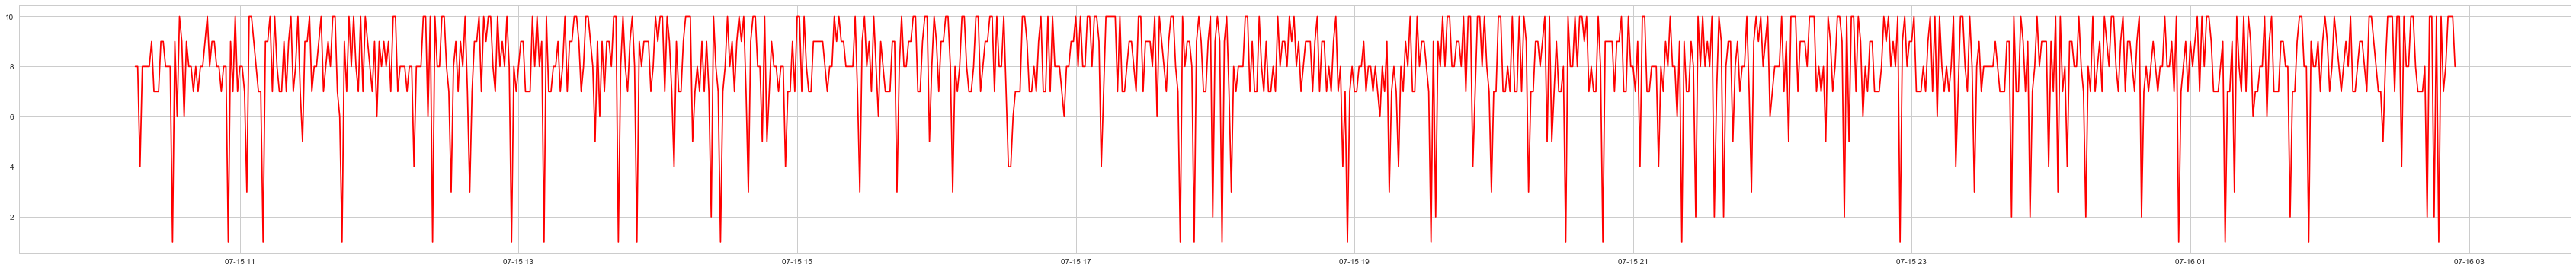

In [10]:
plt.figure(figsize=(60,6))
plt.plot(dataset['Time'], dataset['Rating'], color='red')
plt.show()

In [11]:
dataset['Rating'].mean()

7.967

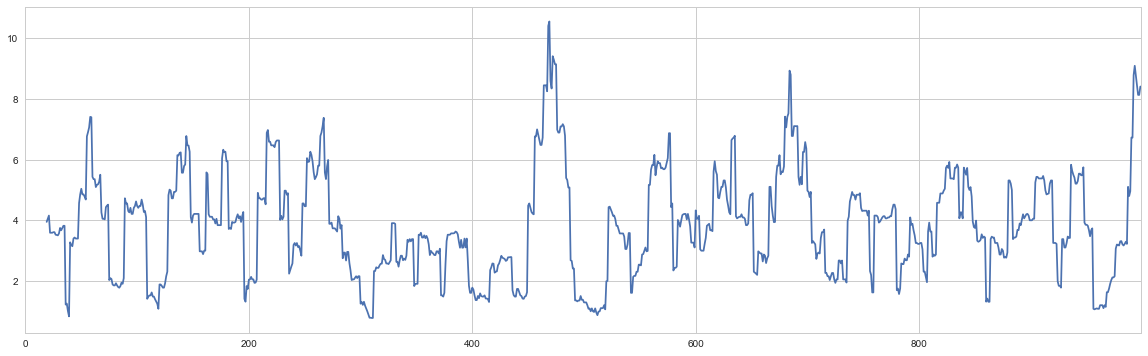

In [32]:
r = dataset['Rating'].rolling(20).var().plot(figsize=(20,6))

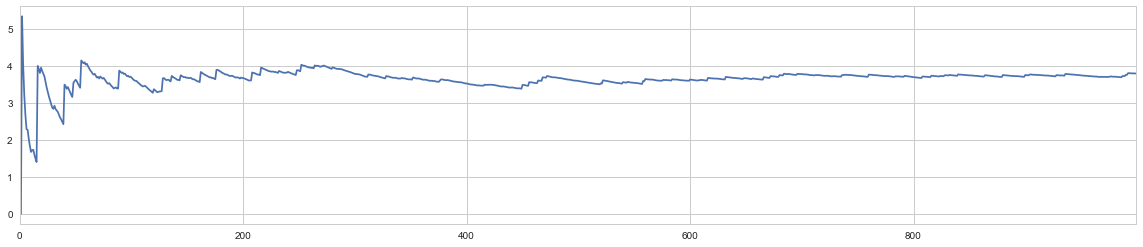

In [31]:
r = dataset['Rating'].expanding().var().plot(figsize=(20,4))

In [33]:
li_avg = []
sum = 0
avg = li[0]
li_avg.append(li[0])
li_dup = li
li_dup.pop(0)
for iter in li_dup:
    avg = avg + iter
    avg = avg / 2
    li_avg. append(avg)
    

In [34]:
dataset['Mean_Rating'] = li_avg

In [36]:
dataset.head()

,Rating,Time,Mean_Rating
0,8,2016-07-15 10:15:00,8.0
1,8,2016-07-15 10:16:00,8.0
2,4,2016-07-15 10:17:00,6.0
3,8,2016-07-15 10:18:00,7.0
4,8,2016-07-15 10:19:00,7.5


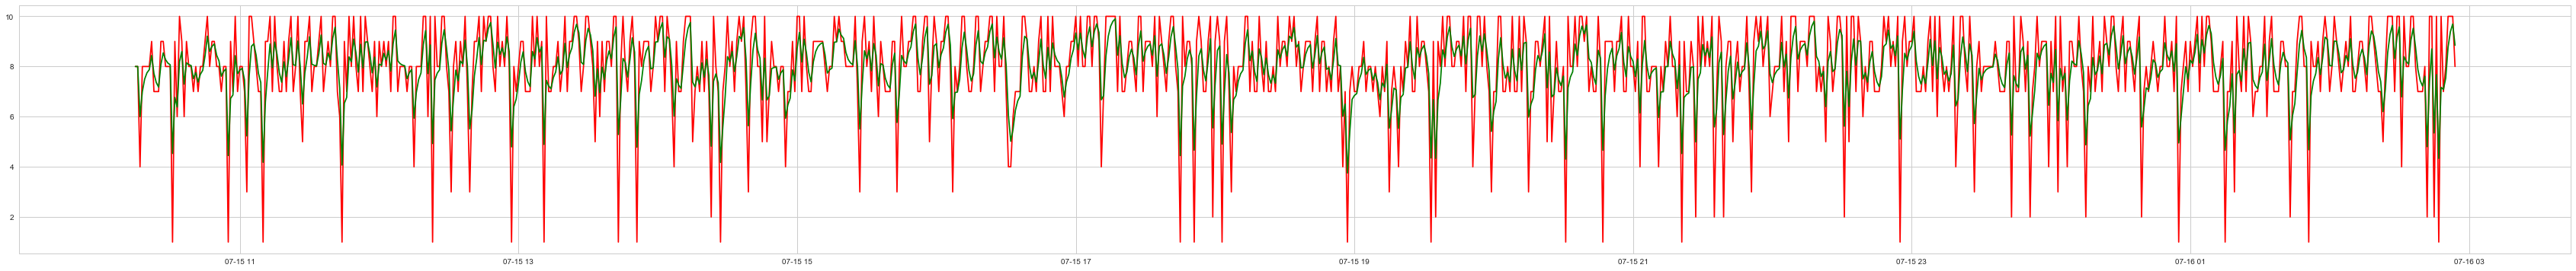

In [41]:
plt.figure(figsize=(60,6))
plt.plot(dataset['Time'], dataset['Rating'], color='red')
plt.plot(dataset['Time'], dataset['Mean_Rating'], color='green')
plt.show()

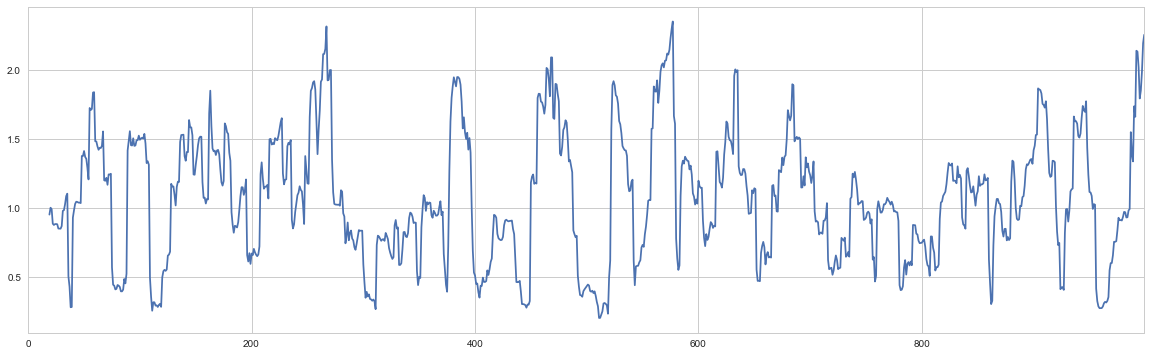

In [42]:
r = dataset['Mean_Rating'].rolling(20).var().plot(figsize=(20,6))